<a href="https://colab.research.google.com/github/ellinshafkat/market-basket/blob/main/Final_Market_Basket_Data_Mining_lab_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
!pip install networkx==2.3
!pip install mlxtend==0.14.0

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
from mlxtend.frequent_patterns import apriori,association_rules
from collections import Counter
from IPython.display import Image

from warnings import filterwarnings
filterwarnings("ignore")

In [45]:
df = pd.read_csv('/content/drive/MyDrive/data mining 11.11.2025/Groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [46]:
df.isnull().sum().sort_values(ascending=False)

,0
Member_number,0
Date,0
itemDescription,0


In [47]:
df["itemDescription"].value_counts().head(10)

,count
itemDescription,
whole milk,2502
other vegetables,1898
rolls/buns,1716
soda,1514
yogurt,1334
root vegetables,1071
tropical fruit,1032
bottled water,933
sausage,924


In [48]:
basket = (df.groupby(['Member_number','itemDescription'])['Date'].count().unstack().reset_index().fillna(0).set_index('Member_number'))
basket.head(10)

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
1005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
1009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [49]:
whole_milk_df = basket.loc[basket['whole milk']==1]
# Convert all non-zero values to 1, effectively binarizing the DataFrame
whole_milk_df_binary = whole_milk_df.applymap(lambda x: 1 if x > 0 else 0)
frequent_itemsets = apriori(whole_milk_df_binary, min_support=0.15, use_colnames=True)
whole_milk_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
whole_milk_rules.sort_values(['lift','support'],ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(rolls/buns),(other vegetables),0.366613,0.397764,0.155751,0.424837,1.068063,0.009925,1.047070
1,"(whole milk, rolls/buns)",(other vegetables),0.366613,0.397764,0.155751,0.424837,1.068063,0.009925,1.047070
2,(rolls/buns),"(whole milk, other vegetables)",0.366613,0.397764,0.155751,0.424837,1.068063,0.009925,1.047070
3,(other vegetables),(rolls/buns),0.397764,0.366613,0.155751,0.391566,1.068063,0.009925,1.041012
4,"(whole milk, other vegetables)",(rolls/buns),0.397764,0.366613,0.155751,0.391566,1.068063,0.009925,1.041012
5,(other vegetables),"(whole milk, rolls/buns)",0.397764,0.366613,0.155751,0.391566,1.068063,0.009925,1.041012
6,(whole milk),(other vegetables),1.000000,0.397764,0.397764,0.397764,1.000000,0.000000,1.000000
7,(other vegetables),(whole milk),0.397764,1.000000,0.397764,1.000000,1.000000,0.000000,inf
8,(whole milk),(rolls/buns),1.000000,0.366613,0.366613,0.366613,1.000000,0.000000,1.000000
9,(rolls/buns),(whole milk),0.366613,1.000000,0.366613,1.000000,1.000000,0.000000,inf


In [50]:
df[df['Member_number']==2222]

,Member_number,Date,itemDescription
1631,2222,08-01-2015,yogurt
3796,2222,21-07-2015,berries
4881,2222,28-12-2015,whole milk
8433,2222,28-12-2015,sausage
10571,2222,13-02-2014,grapes
11296,2222,03-04-2014,pork
14695,2222,31-07-2014,sugar
15709,2222,21-07-2015,other vegetables
17780,2222,08-01-2015,dental care
19945,2222,21-07-2015,butter


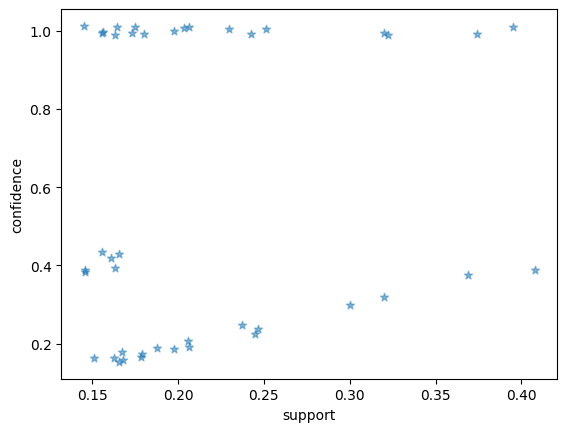

In [51]:
import random
import matplotlib.pyplot as plt

# Extract support and confidence from whole_milk_rules
support = whole_milk_rules['support'].values
confidence = whole_milk_rules['confidence'].values

for i in range (len(support)):
    support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5)
    confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)

# Creating a scatter plot of support v confidence
plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

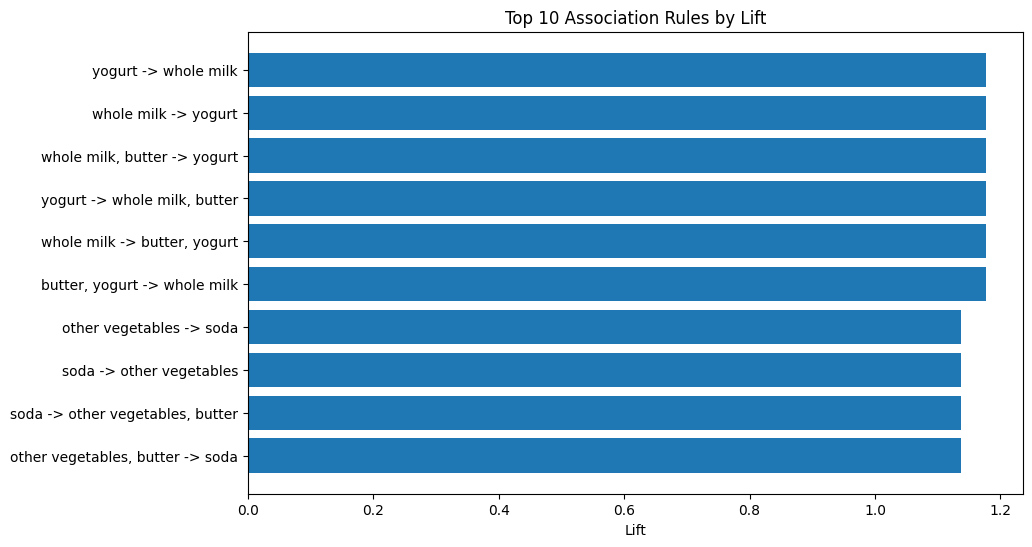

In [52]:
cat_df = basket.loc[basket['butter']==1]
# Convert all non-zero values to 1, effectively binarizing the DataFrame
cat_df_binary = cat_df.applymap(lambda x: 1 if x > 0 else 0)
frequent_itemsets = apriori(cat_df_binary, min_support=0.15, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
top_rules = rules.sort_values(by='lift', ascending=False).head(10)

top_rules['antecedents_str'] = top_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
top_rules['consequents_str'] = top_rules['consequents'].apply(lambda x: ', '.join(list(x)))


plt.figure(figsize=(10, 6))
plt.barh(range(len(top_rules)), top_rules['lift'], tick_label=top_rules['antecedents_str'] + ' -> ' + top_rules['consequents_str'])
plt.xlabel('Lift')
plt.title('Top 10 Association Rules by Lift')
plt.gca().invert_yaxis()
plt.show()

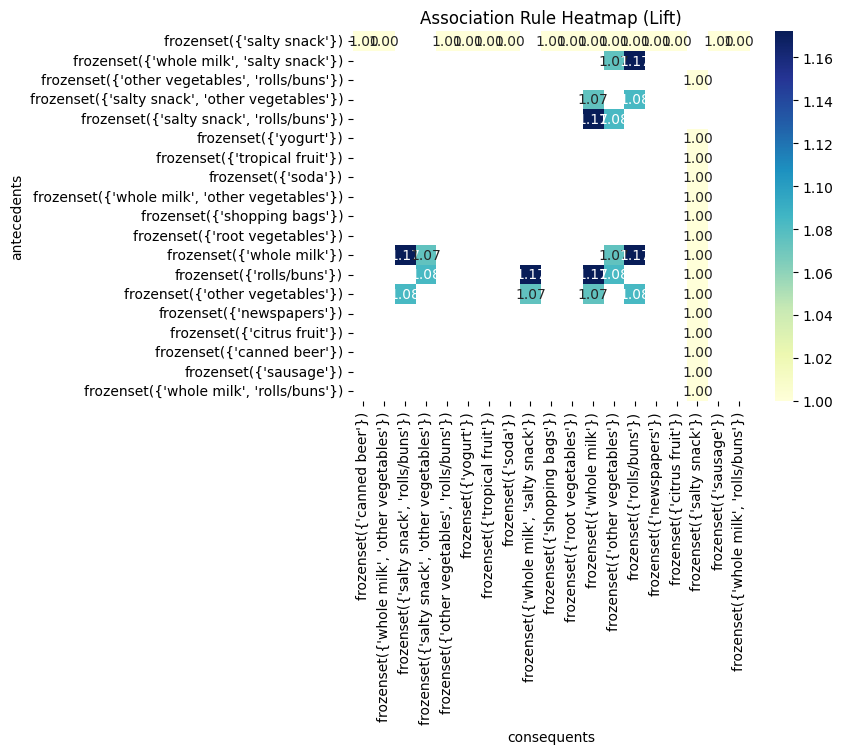

In [53]:
import seaborn as sns

cat_df = basket.loc[basket['salty snack']==1]
# Convert all non-zero values to 1, effectively binarizing the DataFrame
cat_df_binary = cat_df.applymap(lambda x: 1 if x > 0 else 0)
frequent_itemsets = apriori(cat_df_binary, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

heatmap_data = rules.pivot(index='antecedents', columns='consequents', values='lift')

sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Association Rule Heatmap (Lift)')
plt.show()

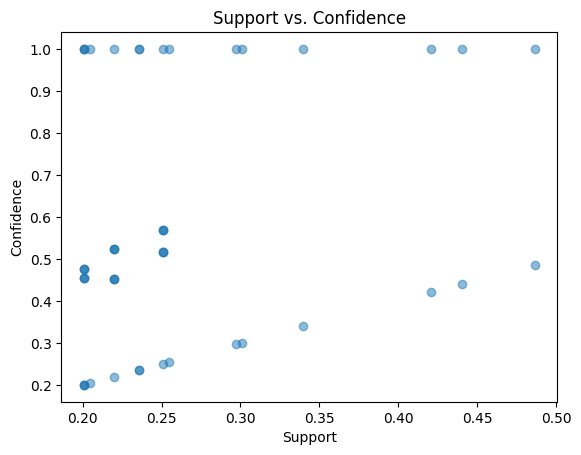

In [54]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs. Confidence')
plt.show()